In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('t20s_2013-23_mgd.csv').drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

C:\Users\anees\AppData\Local\Temp\ipykernel_4620\3748546470.py:1: DtypeWarning: Columns (54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('t20s_2013-23_mgd.csv').drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])


In [3]:
df.columns

Index(['p_match', 'inns', 'bat', 'p_bat', 'team_bat', 'bowl', 'p_bowl',
       'team_bowl', 'ball', 'ball_id', 'outcome', 'score', 'out', 'dismissal',
       'p_out', 'over', 'ball.1', 'noball', 'wide', 'byes', 'legbyes',
       'cur_bat_runs', 'cur_bat_bf', 'cur_bowl_ovr', 'cur_bowl_wkts',
       'cur_bowl_runs', 'inns_runs', 'inns_wkts', 'inns_balls',
       'inns_runs_rem', 'inns_balls_rem', 'inns_rr', 'inns_rrr', 'target',
       'max_balls', 'date', 'year', 'ground', 'country', 'winner', 'toss',
       'competition', 'bat_hand', 'bowl_style', 'bowl_kind', 'batruns',
       'ballfaced', 'bowlruns', 'bat_out', 'wagonX', 'wagonY', 'wagonZone',
       'pitchLine', 'pitchLength', 'shotType'],
      dtype='object')

In [4]:
df.head()

,p_match,inns,bat,p_bat,team_bat,bowl,p_bowl,team_bowl,ball,ball_id,...,batruns,ballfaced,bowlruns,bat_out,wagonX,wagonY,wagonZone,pitchLine,pitchLength,shotType
0,1001349,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,1,1001349_1_1_1,...,0,1,0,True,208,178,3,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,DEFENDED
1,1001349,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,2,1001349_1_1_2,...,0,1,0,True,243,175,3,ON_THE_STUMPS,GOOD_LENGTH,DEFENDED
2,1001349,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,3,1001349_1_1_3,...,1,1,1,True,189,242,4,ON_THE_STUMPS,SHORT_OF_A_GOOD_LENGTH,DEFENDED
3,1001351,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,3,1001351_1_1_3,...,0,1,0,True,166,194,5,OUTSIDE_OFFSTUMP,SHORT_OF_A_GOOD_LENGTH,DEFENDED
4,1001351,1,Aaron Finch,5334,Australia,Lasith Malinga,49758,Sri Lanka,4,1001351_1_1_4,...,4,1,4,True,15,222,6,OUTSIDE_OFFSTUMP,GOOD_LENGTH,CUT_SHOT


In [5]:
df[(df['ball']>11)][['team_bat','team_bowl','inns','ball','over','date','competition']]

,team_bat,team_bowl,inns,ball,over,date,competition
165211,Titans,Dolphins,1,12,17,2016-11-20,CSA T20 Challenge
328978,Dolphins,Lions,1,13,17,2015-11-04,Ram Slam T20 Challenge
328979,Dolphins,Lions,1,12,18,2015-11-04,Ram Slam T20 Challenge
428555,Panadura Sports Club,Sri Lanka Army,1,12,4,2021-03-07,SLC T20
622199,Kurunegala Youth Cricket Club,Sri Lanka Navy Sports Club,2,12,1,2022-06-12,Clubs T20
...,...,...,...,...,...,...,...
1434990,Sebastianites Cricket and Athletic Club,Colts Cricket Club,1,23,8,2023-06-07,Clubs T20
1434991,Sebastianites Cricket and Athletic Club,Colts Cricket Club,1,24,8,2023-06-07,Clubs T20
1505956,Malaysia,Hong Kong,1,12,4,2023-09-19,T20I
1507031,Papua New Guinea,Malaysia,2,12,1,2023-09-20,T20I


In [6]:
df[(df['ball']>11)].to_csv('uncleandata.csv')

These very low level T20 leagues, the data quality is often not reliable. Hence, this should explain very high ball values.

In [7]:
df=df[(df['ball']<=11)]

In [8]:
df.shape

(1554887, 55)

In [9]:
df[df['ball']!=df['ball.1']]

,p_match,inns,bat,p_bat,team_bat,bowl,p_bowl,team_bowl,ball,ball_id,...,batruns,ballfaced,bowlruns,bat_out,wagonX,wagonY,wagonZone,pitchLine,pitchLength,shotType


ball.1 is duplicate of attribute ball.

In [10]:
df=df.drop(columns='ball.1')
df.shape

(1554887, 54)

In [11]:
df['bowl_style'].unique()

array(['RF', 'RFM', 'LB', 'LWS', 'RMF', 'SLA', 'OB', 'LBG', 'LFM', 'LF',
       'RM', 'LMF', 'RM/OB', 'LM', 'LFM/SLA', 'OB/LB', 'LM/SLA/LWS',
       'OB/SLA', 'RAB', 'LS', '-', 'LSM', 'RSM', 'RMF/OB', 'RFM/OB',
       'OB/LBG', 'RFM/LBG', 'RM/LB', 'RM/LBG', 'LMF/RM', 'RM/RSM',
       'SLA/LWS', 'LAB', 'RMF/LB', 'RFM/LB', 'RM/OB/LB', 'RS'],
      dtype=object)

In [12]:
df.iloc[:1000].to_excel('t20sample_data.xlsx', index=False)

In [13]:
unique_styles = ['RFM', 'RMF', 'LBG', 'LB', 'LS', 'RAB', 'LAB', 'OB', 'SLA', 'RAB','RSM','LSM']
result = pd.concat([df[df['bowl_style'] == style][['bowl','bowl_style']].drop_duplicates().head(2) for style in unique_styles])
result

,bowl,bowl_style
2276,Nuwan Kulasekara,RFM
3078,Vikum Sanjaya,RFM
7715,Asela Gunaratne,RMF
28810,Andrew Tye,RMF
20353,Fawad Ahmed,LBG
40125,Adam Zampa,LBG
3598,Seekkuge Prasanna,LB
55231,Cameron Boyce,LB
715323,Mohammed Aslam,LS
1100250,Manson Chikowero,LS


There are few bowling types which have ambiguous values. So after researching the bowlers, we came to know:
1. RFM, RMF means Right Arm Medium Fast
2. LBG, LB means Leg Break, which is usually right arm wrist spin bowlers
3. LS, SLA means Slow Left Arm Offie
4. OB means Right Arm Offie
5. RAB,LAB means Right/Left Arm Bowler, who is likely a part timer who don't have any particular style. Thus we are converting them to RSM(right arm slow medium) and LSM(left arm slow medium). 
Now we are changing these values into more understandable format.

In [14]:
df['bowl_style'] = df['bowl_style'].replace(['RFM', 'RMF'], 'RFM')
df['bowl_style'] = df['bowl_style'].replace(['LBG', 'LB'], 'RWS')
df['bowl_style'] = df['bowl_style'].replace(['LS', 'SLA'], 'SLA')
df['bowl_style'] = df['bowl_style'].replace(['RAB'], 'RSM')
df['bowl_style'] = df['bowl_style'].replace(['LAB'], 'LSM')
unique_styles = ['LFM/SLA', 'OB/LB','LM/SLA/LWS','OB/SLA','RMF/OB', 'RFM/OB', 'OB/LBG', 'RFM/LBG', 'RM/LB',
       'RM/LBG', 'LMF/RM', 'RM/RSM', 'SLA/LWS', 'RMF/LB', 'RFM/LB',
       'RM/OB/LB']
replacements = {
    'RFM': 'RFM',
    'RMF': 'RFM',
    'LBG': 'RWS',
    'LB': 'RWS',
    'LS': 'SLA',
    'SLA': 'SLA',
    'RAB': 'RS',
    'LAB': 'LS'
}

# Iterate over unique styles and apply replacements
for style in unique_styles:
    replaced_style = '/'.join([replacements.get(part, part) for part in style.split('/')])
    df['bowl_style'] = df['bowl_style'].replace([style], replaced_style)
df['bowl_style'].unique()

array(['RF', 'RFM', 'RWS', 'LWS', 'SLA', 'OB', 'LFM', 'LF', 'RM', 'LMF',
       'RM/OB', 'LM', 'LFM/SLA', 'OB/RWS', 'LM/SLA/LWS', 'OB/SLA', 'RSM',
       '-', 'LSM', 'RFM/OB', 'RFM/RWS', 'RM/RWS', 'LMF/RM', 'RM/RSM',
       'SLA/LWS', 'RM/OB/RWS', 'RS'], dtype=object)

In [15]:
df.isna().sum()

p_match                 0
inns                    0
bat                     0
p_bat                   0
team_bat                0
bowl                    0
p_bowl                  0
team_bowl               0
ball                    0
ball_id                 0
outcome                 0
score                   0
out                     0
dismissal         1469949
p_out                   0
over                    0
noball                  0
wide                    0
byes                    0
legbyes                 0
cur_bat_runs            0
cur_bat_bf              0
cur_bowl_ovr            0
cur_bowl_wkts           0
cur_bowl_runs           0
inns_runs               0
inns_wkts               0
inns_balls              0
inns_runs_rem      820126
inns_balls_rem          0
inns_rr                 0
inns_rrr           820126
target             820126
max_balls               0
date                    0
year                    0
ground                  0
country                 0
winner      

In [16]:
df.describe()

,p_match,inns,p_bat,p_bowl,ball,score,p_out,over,noball,wide,...,inns_rrr,target,max_balls,year,batruns,ballfaced,bowlruns,wagonX,wagonY,wagonZone
count,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,...,734761.000000,734761.000000,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06,1.554887e+06
mean,1.189248e+06,1.472549e+00,5.063180e+05,5.669501e+05,3.620968e+00,1.278893e+00,5.063946e+05,1.002362e+01,5.714242e-03,3.919577e-02,...,10.341222,160.467487,8.801454e+01,2.019634e+03,1.208241e+00,9.675295e-01,1.253151e+00,8.543081e+01,8.985982e+01,2.142561e+00
std,1.508010e+05,4.992461e-01,3.745934e+05,3.755675e+05,1.818188e+00,1.574937e+00,3.746332e+05,5.640178e+00,9.165568e-02,2.557577e-01,...,14.148465,34.966115,5.238543e+01,2.554422e+00,1.586408e+00,1.772462e-01,1.579413e+00,1.103071e+02,1.100803e+02,2.660337e+00
min,7.223350e+05,1.000000e+00,4.068000e+03,4.068000e+03,1.000000e+00,0.000000e+00,4.068000e+03,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,2.015000e+03,-4.000000e+00,0.000000e+00,-3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.125649e+06,1.000000e+00,2.498660e+05,2.976300e+05,2.000000e+00,0.000000e+00,2.498660e+05,5.000000e+00,0.000000e+00,0.000000e+00,...,6.720000,140.000000,0.000000e+00,2.018000e+03,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.213058e+06,1.000000e+00,4.228760e+05,4.937730e+05,4.000000e+00,1.000000e+00,4.229650e+05,1.000000e+01,0.000000e+00,0.000000e+00,...,8.620000,161.000000,1.200000e+02,2.020000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.304057e+06,2.000000e+00,7.235730e+05,8.376110e+05,5.000000e+00,1.000000e+00,7.243810e+05,1.500000e+01,0.000000e+00,0.000000e+00,...,10.880000,182.000000,1.200000e+02,2.022000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.780000e+02,1.890000e+02,4.000000e+00
max,1.412550e+06,2.000000e+00,1.414161e+06,1.413607e+06,1.100000e+01,8.000000e+00,1.414161e+06,2.100000e+01,6.000000e+00,6.000000e+00,...,1002.000000,315.000000,3.000000e+02,2.023000e+03,7.000000e+00,1.000000e+00,8.000000e+00,4.150000e+02,4.660000e+02,8.000000e+00


We can see that the attributes batruns and bowlruns has negative values which is the errors in the data. These data should be removed

In [17]:
df=df[(df['batruns']>=0) & (df['bowlruns']>=0)]
df.shape

(1554671, 54)

Understanding WagonX, WagonY and WagonZone attributes

In [18]:
df.groupby(['wagonZone']).agg({'wagonX':'mean','wagonY':'mean'}).reset_index()

,wagonZone,wagonX,wagonY
0,0,0.000000,0.000000
1,1,228.723680,66.956557
2,2,279.865352,126.732172
3,3,284.986903,212.424818
4,4,221.928538,270.105581
5,5,137.538450,268.838547
6,6,84.483881,207.445834
7,7,86.823447,128.386469
8,8,151.927968,93.099248


# Batter's performaces against every bowling type

In [19]:
total_runs=df.groupby(['p_bat','bat','bowl_style']).agg({'p_match':'nunique','batruns':'sum','ballfaced':'sum'}).reset_index().sort_values(by='batruns',ascending=False)
total_runs['strike rate']=total_runs['batruns']*100/total_runs['ballfaced']
total_runs.rename(columns={'p_match':'matches'},inplace=True)
total_runs.head()

,p_bat,bat,bowl_style,matches,batruns,ballfaced,strike rate
5661,249866,Alex Hales,RFM,233,2799,1825,153.369863
6908,296597,James Vince,RFM,203,2721,1919,141.792600
9875,348144,Babar Azam,RFM,184,2662,1951,136.442850
5127,232359,Colin Munro,RFM,217,2632,1732,151.963048
128,5334,Aaron Finch,RFM,176,2494,1647,151.426837


In [20]:
total_outs=df[df['out']==True].groupby(['p_bat','bat','bowl_style']).size().reset_index(name='count').sort_values(by='count',ascending=False)
total_outs.rename(columns={'count':'dismissals'},inplace=True)
total_outs.head()

,p_bat,bat,bowl_style,dismissals
3743,249866,Alex Hales,RFM,92
4548,296597,James Vince,RFM,79
7831,403902,Liam Livingstone,RFM,78
11680,571911,Joe Clarke,RFM,76
4921,303427,Paul Stirling,RFM,75


In [21]:
merged_df=pd.merge(total_runs,total_outs,on=['p_bat','bat','bowl_style'])
merged_df.columns

Index(['p_bat', 'bat', 'bowl_style', 'matches', 'batruns', 'ballfaced',
       'strike rate', 'dismissals'],
      dtype='object')

In [22]:
merged_df['average']=merged_df['batruns']/merged_df['dismissals']
merged_df=merged_df[merged_df['ballfaced']>100].sort_values(by='average',ascending=False)
merged_df.shape

(3482, 9)

In [23]:
merged_df.to_excel('batters_against_bowlingtype.xlsx', index=False)

In [24]:
batters_against_rws=merged_df[merged_df['bowl_style']=='RWS'].sort_values(by='strike rate',ascending=False)
batters_against_rws.head(15)

,p_bat,bat,bowl_style,matches,batruns,ballfaced,strike rate,dismissals,average
145,51880,Chris Gayle,RWS,75,937,496,188.911290,23,40.739130
1082,877051,Tom Banton,RWS,32,331,180,183.888889,11,30.090909
1890,959759,Finn Allen,RWS,20,217,119,182.352941,6,36.166667
2092,227762,Sharjeel Khan,RWS,15,201,111,181.081081,5,40.200000
2328,50747,Upul Tharanga,RWS,18,182,103,176.699029,7,26.000000
630,436757,Heinrich Klaasen,RWS,51,465,266,174.812030,13,35.769231
716,1137262,Azam Khan,RWS,48,432,249,173.493976,14,30.857143
982,230558,Sunil Narine,RWS,51,351,204,172.058824,21,16.714286
2238,1070183,Abhishek Sharma,RWS,19,190,113,168.141593,8,23.750000
678,662235,Josh Inglis,RWS,43,445,270,164.814815,13,34.230769


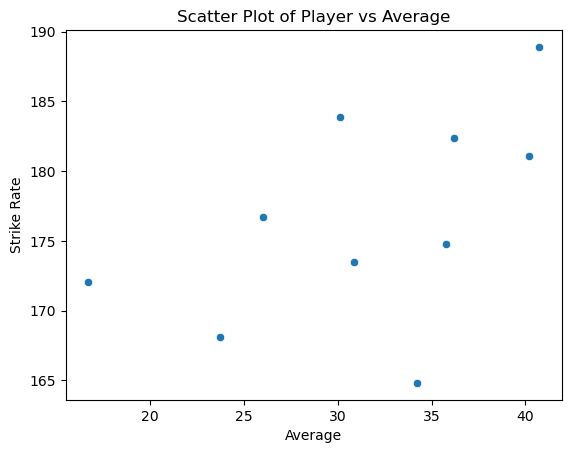

In [25]:
sns.scatterplot(data=batters_against_rws.iloc[:10],x='average',y='strike rate')
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.title('Scatter Plot of Player vs Average')
plt.show()

# Bowler's performance against right and left handed batters

In [26]:
bowl_df=df.groupby(['p_bowl','bowl','bat_hand']).agg({'bowlruns':'sum','ballfaced':'sum','p_match':'nunique','bowl_style':'max'}).reset_index()
bowl_df['economy']=bowl_df['bowlruns']*6/bowl_df['ballfaced']
bowl_df.head()

,p_bowl,bowl,bat_hand,bowlruns,ballfaced,p_match,bowl_style,economy
0,4068,Jim Allenby,LHB,106,82,13,RM,7.756098
1,4068,Jim Allenby,RHB,279,195,21,RM,8.584615
2,4504,Ahillen Beadle,RHB,61,48,2,SLA,7.625000
3,4508,Doug Bollinger,LHB,180,130,18,LFM,8.307692
4,4508,Doug Bollinger,RHB,390,273,20,LFM,8.571429


In [27]:
bowl_outs=df[df['out']==True].groupby(['p_bowl','bowl','bat_hand']).size().reset_index(name='outs')
bowl_outs.head()

,p_bowl,bowl,bat_hand,outs
0,4068,Jim Allenby,LHB,1
1,4068,Jim Allenby,RHB,7
2,4504,Ahillen Beadle,RHB,1
3,4508,Doug Bollinger,LHB,6
4,4508,Doug Bollinger,RHB,13


In [28]:
merged_bowl=pd.merge(bowl_df,bowl_outs,on=['p_bowl','bowl','bat_hand'])
merged_bowl['average']=merged_bowl['bowlruns']/merged_bowl['outs']
merged_bowl['strike rate']=merged_bowl['ballfaced']/merged_bowl['outs']
merged_bowl=merged_bowl[(merged_bowl['p_match']>15) & (merged_bowl['ballfaced']>300)].sort_values(by='average', ascending=True)
merged_bowl.head()

,p_bowl,bowl,bat_hand,bowlruns,ballfaced,p_match,bowl_style,economy,outs,average,strike rate
3234,637478,Dhruvkumar Maisuria,RHB,249,303,19,RWS,4.930693,33,7.545455,9.181818
5323,1155526,Peter Aho,RHB,293,402,27,RFM,4.373134,38,7.710526,10.578947
5733,1178061,Alpesh Ramjani,RHB,423,535,29,SLA,4.743925,47,9.000000,11.382979
5737,1178080,Vraj Patel,RHB,464,556,33,SLA,5.007194,47,9.872340,11.829787
5329,1155541,Samuel Conteh,RHB,299,340,20,RM,5.276471,29,10.310345,11.724138


In [29]:
merged_bowl.shape

(1273, 11)

In [30]:
merged_bowl.to_excel('Bowling Performaces against left and right handers.xlsx',index=False)

In [31]:
df[(df['p_match']=='1174798')]

,p_match,inns,bat,p_bat,team_bat,bowl,p_bowl,team_bowl,ball,ball_id,...,batruns,ballfaced,bowlruns,bat_out,wagonX,wagonY,wagonZone,pitchLine,pitchLength,shotType
